In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

In [6]:
!wget -O nsfg.hdf5 https://www.dropbox.com/s/k68hk1w3rhgsqvv/nsfg.hdf5?dl=0

--2021-05-15 14:53:21--  https://www.dropbox.com/s/k68hk1w3rhgsqvv/nsfg.hdf5?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/k68hk1w3rhgsqvv/nsfg.hdf5 [following]
--2021-05-15 14:53:21--  https://www.dropbox.com/s/raw/k68hk1w3rhgsqvv/nsfg.hdf5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3826a7d1ac9e440f926d27c3f5.dl.dropboxusercontent.com/cd/0/inline/BOg-ckRdt_-6cj1flZyTVTLGdVKV3kS3k1jh3n9o1ROVDD_nSIjQJr1yE3K3SojI3aZR4E50jiBfUy9S75aUCLt27PTrw72RkQstjyKVXDYnzKr5BVVBHpdGqfJ5OWA5yU9BmZqa18e43qljflc1kElh/file# [following]
--2021-05-15 14:53:21--  https://uc3826a7d1ac9e440f926d27c3f5.dl.dropboxusercontent.com/cd/0/inline/BOg-ckRdt_-6cj1flZyTVTLGdVKV3kS3k1jh3n9o1ROVDD_nSIjQJr1yE3K3SojI3aZR4E50jiBfUy9S75aUCLt27PT

In [7]:
import pandas as pd 
hdf = pd.HDFStore('nsfg.hdf5',mode = 'r')

In [43]:
hdf.keys()

['/nsfg']

In [44]:
nsfg = hdf.get('/nsfg')


In [45]:
type(nsfg)

pandas.core.frame.DataFrame

In [46]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [47]:
#Clean a variable 
import numpy as np 
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


In [11]:
#compute a variable 
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


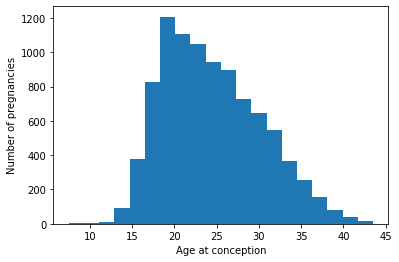

In [12]:
 import matplotlib.pyplot as plt
# Plot the histogram

plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

In [26]:

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

NameError: ignored

In [ ]:
#compute the birthweight 
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.372323879231473


In [ ]:
# Filter
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


In [30]:
!wget -O gss.hdf5 https://www.dropbox.com/s/o0e4clrbpv8fntw/gss.hdf5?dl=0

--2021-05-15 17:28:27--  https://www.dropbox.com/s/o0e4clrbpv8fntw/gss.hdf5?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/o0e4clrbpv8fntw/gss.hdf5 [following]
--2021-05-15 17:28:28--  https://www.dropbox.com/s/raw/o0e4clrbpv8fntw/gss.hdf5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7a07c8d4d57b3c8c1b02e8c1da.dl.dropboxusercontent.com/cd/0/inline/BOjTQtSHyd_agkABQOAw0wBP2e5Smx56KGfsGcZ6NJrz0gClt9uN9TVO9x338dRz7RP5RV44PAPXyvz9tZawZsnjDUqGgEkoLkWQpIbvRwa39OpJ3kxQS4eamjtKN4SY1917qOVGKImVbivjoIWY7bEl/file# [following]
--2021-05-15 17:28:28--  https://uc7a07c8d4d57b3c8c1b02e8c1da.dl.dropboxusercontent.com/cd/0/inline/BOjTQtSHyd_agkABQOAw0wBP2e5Smx56KGfsGcZ6NJrz0gClt9uN9TVO9x338dRz7RP5RV44PAPXyvz9tZawZsnjDUqGgE

In [31]:
gss = pd.read_hdf('gss.hdf5')

In [32]:
gss.dtypes

year         int64
age        float64
cohort     float64
sex          int64
race         int64
educ       float64
realinc    float64
gunlaw     float64
grass      float64
wtssall    float64
dtype: object

In [10]:
type(gss)

pandas.core.frame.DataFrame

In [11]:
gss.head(3)

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339


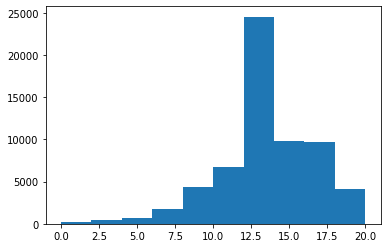

In [32]:
educ= gss['educ']
plt.hist(educ.dropna(),label='educ')
plt.show()

In [26]:
gss.dtypes

year         int64
age        float64
cohort     float64
sex          int64
race         int64
educ       float64
realinc    float64
gunlaw     float64
grass      float64
wtssall    float64
dtype: object

In [5]:
!pip install empiricaldist

In [28]:
gss['year'].unique()

array([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1980, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1996, 1998,
       2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016])

In [11]:
from  empiricaldist import Pmf #Check this output 
# Compute the PMF for year
pmf_year = Pmf(gss['year'])

print(pmf_year)

0        1972
1        1972
2        1972
3        1972
4        1972
         ... 
62461    2016
62462    2016
62463    2016
62464    2016
62465    2016
Name: , Length: 62466, dtype: int64


In [14]:
d6 = Pmf.from_seq([1,2,3,3,5,4,5,6], normalize=False)
print(d6)

1    1
2    1
3    2
4    1
5    2
6    1
Name: , dtype: int64


In [16]:
from  empiricaldist import Cdf #Check this output 
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age(30))

27.0


In [17]:
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

NameError: ignored

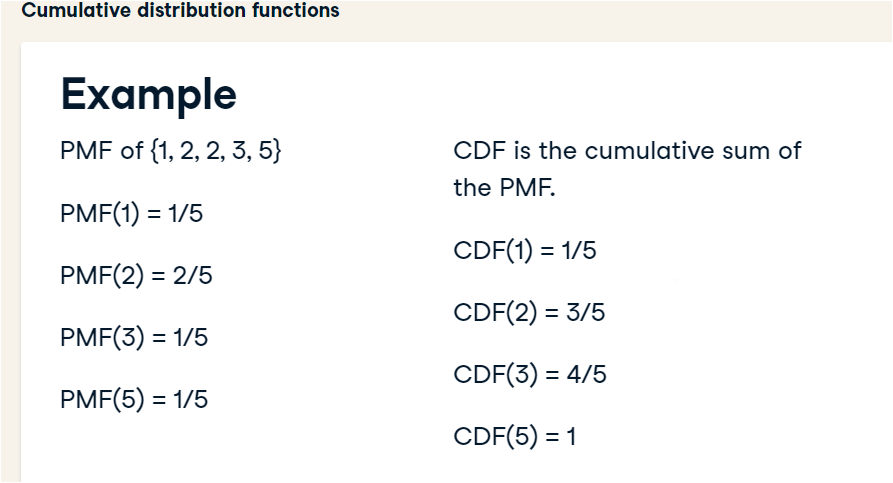

In [23]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age(30))

27.0


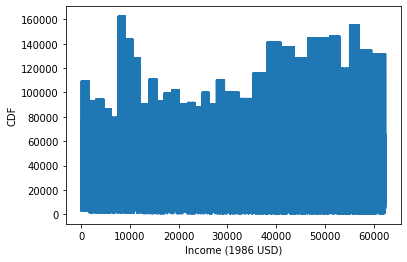

In [18]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

In [19]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school
high = (educ <= 12)
print(high.mean())

0.5308807991547402


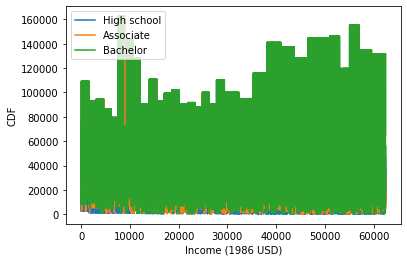

In [24]:
income = gss['realinc']

# Plot the CDFs
Cdf(income[high]).plot(label='High school',kind="line")#check why line plots are not coming up 
Cdf(income[assc]).plot(label='Associate',kind="line")
Cdf(income[bach]).plot(label='Bachelor',kind="line")

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

#Modeling distributions


In [25]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

4.371148677933652 0.4290082383271419


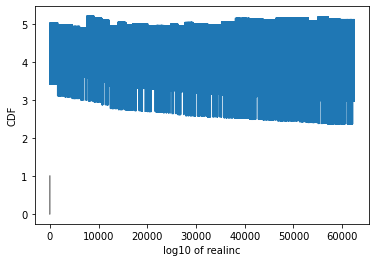

In [26]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()




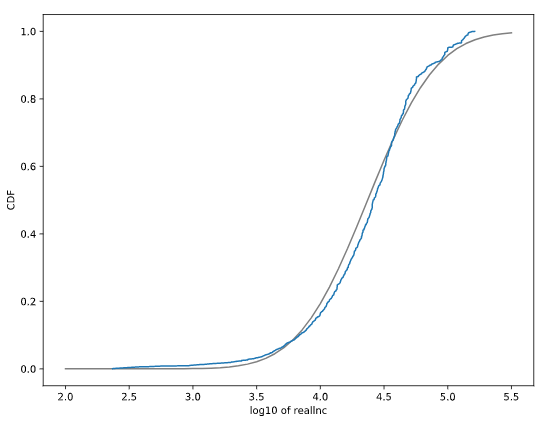

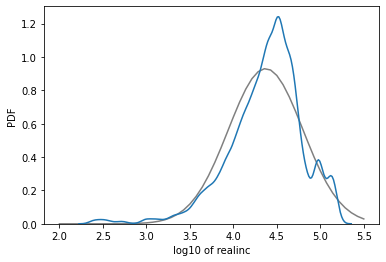

In [28]:
import seaborn as sns

# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

In [ ]:
# https://web.stanford.edu/class/archive/cs/cs109/cs109.1192/handouts/pythonForProbability.html

#Third dataset

In [7]:
!wget -O brfss.hdf5 https://www.dropbox.com/s/hbph4i6nwq5l60d/brfss.hdf5?dl=0

--2021-05-15 16:44:58--  https://www.dropbox.com/s/hbph4i6nwq5l60d/brfss.hdf5?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hbph4i6nwq5l60d/brfss.hdf5 [following]
--2021-05-15 16:44:58--  https://www.dropbox.com/s/raw/hbph4i6nwq5l60d/brfss.hdf5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc19d7d14dfefbf714817b020d24.dl.dropboxusercontent.com/cd/0/inline/BOg9yYE3d1F1N8qzYNMRbJ-p0xuMthwGZ8o20RkBrNtfaI4ViY6Ui51HyyjZ_OKjf7hcpDc87h5YKxDY3cGgYH2Il9Knb4lRn29eNKAcUS3NGEV-TH36bBNPQ9n9s1sn7kA3B9VQLAfXtMetZyKe_7v0/file# [following]
--2021-05-15 16:44:59--  https://uc19d7d14dfefbf714817b020d24.dl.dropboxusercontent.com/cd/0/inline/BOg9yYE3d1F1N8qzYNMRbJ-p0xuMthwGZ8o20RkBrNtfaI4ViY6Ui51HyyjZ_OKjf7hcpDc87h5YKxDY3cGgYH2I

In [10]:
hdf02 = pd.HDFStore('brfss.hdf5',mode = 'r')

In [11]:
b = hdf02.keys()

In [12]:
brfss = pd.read_hdf('brfss.hdf5')

In [13]:
brfss.head(2)

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5


In [14]:
brfss.columns

Index(['SEX', 'HTM4', 'WTKG3', 'INCOME2', '_LLCPWT', '_AGEG5YR', '_VEGESU1',
       '_HTMG10', 'AGE'],
      dtype='object')

In [ ]:
# Extract AGE
age = brfss['_AGEG5YR']

# Plot the PMF
pmf_age = Pmf(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

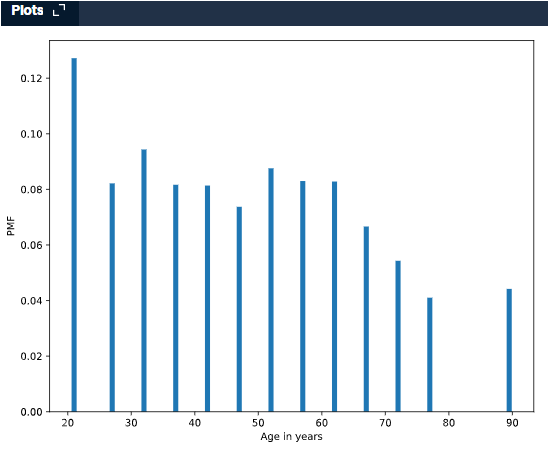

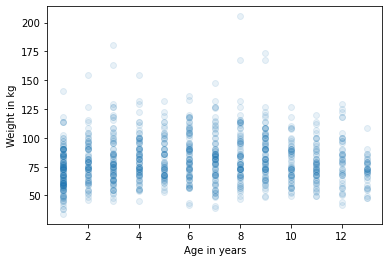

In [16]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['_AGEG5YR']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

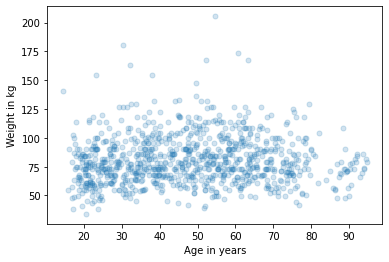

In [17]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

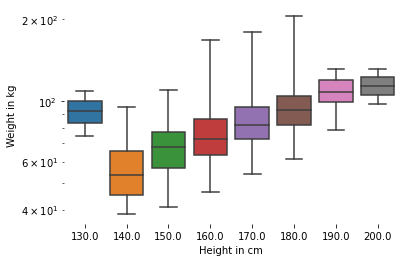

In [21]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


In [ ]:

# Extract income
income = brfss['INCOME2']

# Plot the PMF
Pmf(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

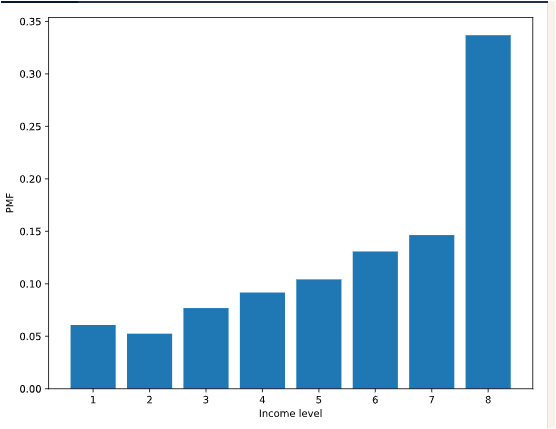

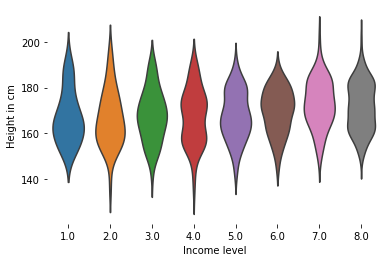

In [24]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

In [25]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


In [26]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)


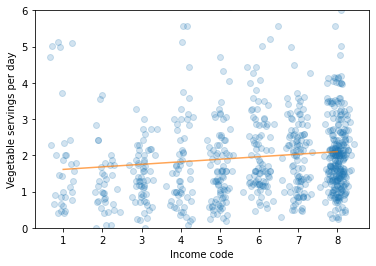

In [27]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

In [28]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data=brfss).fit()
print(results.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)
Intercept    1.541376
INCOME2      0.070000
dtype: float64


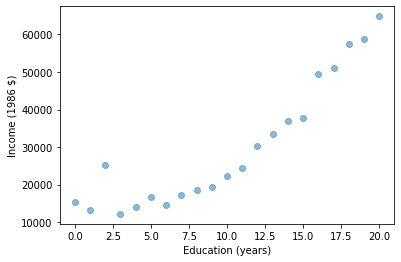

In [33]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.clf()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [37]:


# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2




In [ ]:

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()


# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())


PatsyError: ignored

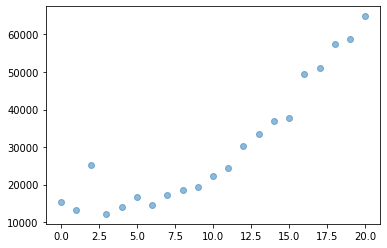

In [39]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

In [40]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

PatsyError: ignored

In [41]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

PatsyError: ignored

In [42]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()

PatsyError: ignored